<a href="https://colab.research.google.com/github/18520395/CS114.K21/blob/master/snakeclassification/snake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
from keras.preprocessing.image import load_img
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array

In [ ]:
!unzip '/content/drive/My Drive/snake.zip'

Archive:  /content/drive/My Drive/snake.zip
   creating: snake/
   creating: snake/non_venomous/
  inflating: snake/non_venomous/01544675.jpg  
  inflating: snake/non_venomous/01544684.jpg  
  inflating: snake/non_venomous/01544685.jpg  
  inflating: snake/non_venomous/120091521-spalerosophis-atriceps-is-a-species-of-snake-of-the-family-colubridae.jpg  
  inflating: snake/non_venomous/1280px-Coelognathus_radiatus.jpg  
  inflating: snake/non_venomous/141500184-ptyas-korros-commonly-known-as-the-chinese-ratsnake-or-indo-chinese-rat-snake-is-a-species-of-colubr.jpg  
  inflating: snake/non_venomous/141500192-ptyas-korros-commonly-known-as-the-chinese-ratsnake-or-indo-chinese-rat-snake-is-a-species-of-colubr.jpg  
  inflating: snake/non_venomous/141500428-ptyas-korros-commonly-known-as-the-chinese-ratsnake-or-indo-chinese-rat-snake-is-a-species-of-colubr.jpg  
  inflating: snake/non_venomous/143882327-ptyas-korros-commonly-known-as-the-chinese-ratsnake-or-indo-chinese-rat-snake-is-a-speci

In [ ]:
# Lấy đường dẫn đến từng ảnh
image_path = list(paths.list_images('/content/snake'))

In [ ]:
# Các class có trong dataset
label = os.listdir('/content/snake/')
label

['non_venomous', 'venomous']

In [ ]:
# Tạo list chứa các đường dẫn đến ảnh của mỗi class
venomous_imgs = []
non_venomous_imgs = []

for i in os.listdir('/content/snake/venomous/'):
      venomous_imgs.append('/content/snake/venomous/'+i)
for i in os.listdir('/content/snake/non_venomous/'):
      non_venomous_imgs.append('/content/snake/non_venomous/'+i)

In [ ]:
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected layer ở cuối.
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# Load ảnh và resize về đúng kích thước mà VGG 16 cần là (224,224)
list_image = []
for imgpath in venomous_imgs:
    #load ảnh về size 224, 224 để phù hợp với đầu vào của VGG16
    image = load_img(imgpath, target_size=(224, 224))
    image = img_to_array(image)
    image_1 = np.expand_dims(image, 0)
    #image_1 = imagenet_utils.preprocess_input(image_1)
    list_image.append(image_1)
    # Lật dọc ảnh
    image_2 = cv2.flip(image, 0)
    image_2 = np.expand_dims(image, 0)
    #image_2 = imagenet_utils.preprocess_input(image_2)
    list_image.append(image_2)
    #Lật ngang ảnh
    image_3 = cv2.flip(image, 0)
    image_3 = np.expand_dims(image, 0)
    #image_3 = imagenet_utils.preprocess_input(image_3)
    list_image.append(image_3)
for imgpath in non_venomous_imgs:
    image = load_img(imgpath, target_size=(224, 224))
    image = img_to_array(image)
    image_1 = np.expand_dims(image, 0)
    #image_1 = imagenet_utils.preprocess_input(image_1)
    list_image.append(image_1)

    image_2 = cv2.flip(image, 0)
    image_2 = np.expand_dims(image, 0)
    #image_2 = imagenet_utils.preprocess_input(image_2)
    list_image.append(image_2)

    image_3 = cv2.flip(image, 0)
    image_3 = np.expand_dims(image, 0)
    #image_3 = imagenet_utils.preprocess_input(image_3)
    list_image.append(image_3)

list_image = np.vstack(list_image)

In [ ]:
# Dùng pre-trained model để lấy ra các feature của ảnh
features = model.predict(list_image)

# Giống bước flatten trong CNN, chuyển từ tensor 3 chiều sau ConvNet sang vector 1 chiều
features = features.reshape((features.shape[0], 512*7*7))

In [ ]:
labels = np.hstack((np.ones(len(venomous_imgs)*3), np.zeros(len(non_venomous_imgs)*3)))

In [ ]:
# Chia traing set, test set tỉ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Sử dụng Support Vector Machines để train model
svc = LinearSVC()

t=time.time()
svc = svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train Support Vector Machines...')
# Check the score of the Support Vector Machines
print('Accuracy Support Vector Machines = ', round(svc.score(X_test, y_test), 4))

# Prediction 
y_pred= svc.predict(X_test)
print(classification_report(y_test, y_pred))

1.75 Seconds to train Support Vector Machines...
Accuracy Support Vector Machines =  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       1.00      1.00      1.00        97

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
# Sử dụng Logistic Regression để train model
lr = LogisticRegression()

t=time.time()
lr = lr.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train Logistic Regression...')
# Check the score of the Logistic Regression
print('Accuracy Logistic Regression = ', round(lr.score(X_test, y_test), 4))

# Prediction 
y_pred= lr.predict(X_test)
print(classification_report(y_test, y_pred))

0.95 Seconds to train Logistic Regression...
Accuracy Logistic Regression =  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       1.00      1.00      1.00        97

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
# Sử dụng Random Forest Classifier để train model
rfc = RandomForestClassifier()

t=time.time()
rfc = rfc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train Random Forest Classifier...')
# Check the score of the Random Forest Classifier
print('Accuracy Random Forest Classifier = ', round(rfc.score(X_test, y_test), 4))

# Prediction 
y_pred= rfc.predict(X_test)
print(classification_report(y_test, y_pred))

1.64 Seconds to train Random Forest Classifier...
Accuracy Random Forest Classifier =  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       1.00      1.00      1.00        97

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



load model
và test trên ảnh

Saving 0c7a6c2308e5573bebac305f43754068.jpg to 0c7a6c2308e5573bebac305f43754068.jpg
Saving 0c22daf5db9567cbecec05f98594c443.jpg to 0c22daf5db9567cbecec05f98594c443.jpg
Saving 0c74e1a3e8cf65592bc450f7305ab257.jpg to 0c74e1a3e8cf65592bc450f7305ab257.jpg
Saving 0c394feed9abe7246bcebb59ee62003d.jpg to 0c394feed9abe7246bcebb59ee62003d.jpg
Saving 0c7105819bef4ba538e9b443c631e622.jpg to 0c7105819bef4ba538e9b443c631e622.jpg
Saving 0cd7c51af4e086e7b41566b236417285.jpg to 0cd7c51af4e086e7b41566b236417285.jpg
Saving 0d1b6fd3214e467be5bf26df23e6ea94.jpg to 0d1b6fd3214e467be5bf26df23e6ea94.jpg
Saving 0d3b2dc85665fb59b4f355e73e625496.jpg to 0d3b2dc85665fb59b4f355e73e625496.jpg
Saving 0d06d319cbab185593943a8a349215fb.jpg to 0d06d319cbab185593943a8a349215fb.jpg
Image 1 :


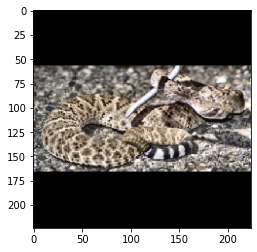

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 2 :


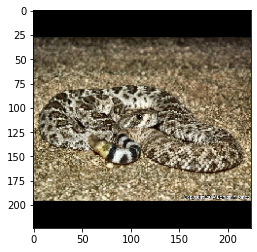

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 3 :


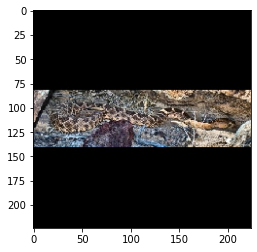

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 4 :


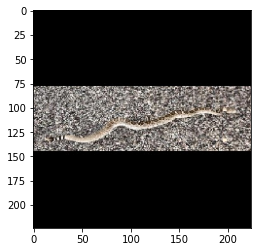

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 5 :


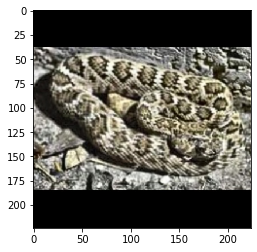

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 6 :


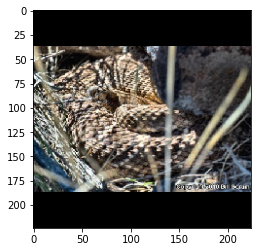

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 7 :


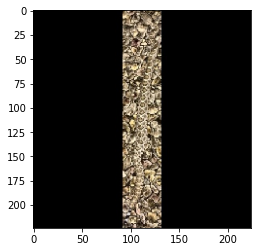

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 8 :


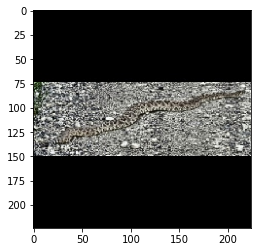

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 9 :


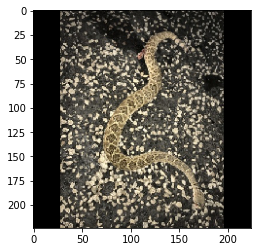

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------


In [ ]:
from google.colab import files
uploaded = files.upload()
list_upload = []
for (i, fn) in enumerate(uploaded.keys()):
  print("Image", i+1, ":")
  path = '/content/' + fn 
  image = load_img(path, target_size=(224, 224))
  plt.imshow(image)
  plt.show()
  image = img_to_array(image)
  image = np.expand_dims(image, 0)
  image = np.vstack([image])
  features = model.predict(image)
  features = features.reshape((features.shape[0], 512*7*7))
  svc_result = svc.predict(features)
  lr_result = lr.predict(features)
  rfc_result = rfc.predict(features)
  print('Support vector machine result: ', end ='')
  if svc_result[0] == 0:
    print('Không có độc')
  else: print('Có độc')
  print('Logistic Regression: ', end = '')
  if lr_result[0] == 0:
    print('Không có độc')
  else: print('Có độc')
  print('Random Forest Classifier: ', end = '')
  if rfc_result[0] == 0:
    print('Không có độc')
  else: print('Có độc')
  print('--------------------')